<center>
<img src="https://wpsovet.ru/wp-content/uploads/1/6/4/1642a836ada1355f35ef577d9024a728.jpg" width="700"> 

# Андан на экономе: домашнее задание 2
</center>

**ФИО:**

Рафф Антон Станиславович

**id из контеста:**

asraff@edu.hse.ru

**Внимание, конкурс!** 

Напиши свой любимый анекдот. Аcсисты и семенаристы устроют голосование. Лучшая тройка получит по бонусному баллу.

**Место для аника:**

Если пьянка неизбежна, пить надо первым 

## Общая информация


__Дата выдачи:__ 06.03.2023

__Мягкий дедлайн:__ 23:59MSK 02.04.2022

__Жесткий дедлайн:__ 23:59MSK 09.04.2022

## Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 100 баллов. За каждый день просрочки после мягкого дедлайна снимается 10 баллов. После жёсткого дедлайна работы не принимаются. Даже при опозданиии на одну секунду. Сдавайте работы заранее.

Мягкий дедлайн можно отодвинуть без потери баллов на 1,2 или 3 дня. Суммарно для откладывания в запасе есть три дня. Можно отодвинуть один дедлайн на три дня, а можно три дедлайна подвинуть на один день. Распоряжаться этими днями студент может как угодно. Жёсткий дедлайн, при этом, не меняется. Если такое произошло, нужно сообщить о сдвиге при сдаче работы.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Любой из студентов может быть вызван на защиту любого домашнего задания. В таком случае итоговая оценка студента определяется в результате защиты.

> За отсутствие названий графиков и подписей к осям могут снижаться баллы. Все картинки должны быть самодостаточны и визуально удобны для восприятия, так чтобы не нужно было смотреть ваш код или знать задание, чтобы понять что на них изображено. Выводы должны быть релевантными. Не забывайте их писать. Если в вопросе требуется ответ словами, а его нет, вы будете терять довольно много баллов.

## Формат сдачи

Сам ноутбук называйте в формате hw-02-NUM-USERNAME.ipynb, где NUM — номер из вашего логина, а USERNAME — ваши фамилия и имя. Файл сдаётся в anytask.

Если хотите, можете разбить тетрадку на несколько разных для своего удобства.

In [45]:
import numpy as np
import pandas as pd

import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns

import random

### data links ###

prices_url = 'https://raw.githubusercontent.com/hse-econ-data-science/andan_2023/main/hw/data/price.tsv'
information_url = 'https://raw.githubusercontent.com/hse-econ-data-science/andan_2023/main/hw/data/information.tsv'
groceries_url = 'https://raw.githubusercontent.com/hse-econ-data-science/andan_2023/main/hw/data/groceries.csv'

# Часть 1: рисковая 

В этом задании мы немного поработаем с ценами на акции. За задание можно получить $50$ баллов.

В табличке `prices.tsv` лежат данные о том, как менялась цена на акции из индексов [S&P-500](https://ru.wikipedia.org/wiki/S%26P_500), [NASDAQ-100](https://ru.wikipedia.org/wiki/Nasdaq-100) и [DJI](https://ru.wikipedia.org/wiki/Промышленный_индекс_Доу_—_Джонса) в течение последних $10$ лет. В табличке `information.tsv` лежит дополнительная полезная информация по ценным бумагам. Подгрузим эти таблицы и посмотрим на них. 

In [7]:
df_prices = pd.read_csv(prices_url, sep='\t')
df_prices = df_prices.drop('GEHC', axis=1) # сликом молодая компания
print(df_prices.shape)
df_prices.head()

(2518, 521)


,Date,A,AAL,AAP,AAPL,ABBV,ABC,ABNB,ABT,ACGL,...,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZM,ZS,ZTS
0,2013-03-05 00:00:00,27.946215,13.245518,71.640678,13.298839,24.972109,41.335518,NaN,28.678448,16.563334,...,58.596577,39.023003,24.914204,39.376095,67.826096,44.869999,20.423979,NaN,NaN,31.940346
1,2013-03-06 00:00:00,28.326160,13.735741,70.923820,13.129805,25.125229,41.515339,NaN,28.347576,16.583332,...,58.563908,39.283100,25.693598,39.738384,67.343094,44.790001,20.907482,NaN,NaN,31.530493
2,2013-03-07 00:00:00,28.332716,13.971428,70.961044,13.281566,24.958796,41.172813,NaN,28.479918,16.813334,...,58.008087,39.515335,24.870417,39.940308,66.985306,44.619999,21.057535,NaN,NaN,32.191845
3,2013-03-08 00:00:00,28.188597,14.065701,71.538284,13.316731,24.858923,41.515339,NaN,28.686729,16.879999,...,58.178085,39.701115,24.896696,40.219440,67.441467,45.040001,21.090885,NaN,NaN,31.754053
4,2013-03-11 00:00:00,28.044483,14.263680,72.180695,13.506428,25.078619,41.575287,NaN,28.893517,16.940001,...,58.302341,39.812572,25.185684,40.290707,67.745613,45.470001,21.365984,NaN,NaN,31.837889


In [8]:
df_inf = pd.read_csv(information_url, sep='\t')
print(df_inf.shape)
df_inf.head()

(525, 12)


,Symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Headquarters Location,Date first added,CIK,Founded,S&P-500,NASDAQ,DJI
0,A,Agilent Technologies Inc,reports,Health Care,Health Care Equipment,"Santa Clara, California",05.06.00,1090872.0,1999.0,True,False,False
1,AAL,American Airlines Group,reports,Industrials,Airlines,"Fort Worth, Texas",23.03.15,6201.0,1934.0,True,False,False
2,AAP,Advance Auto Parts,reports,Consumer Discretionary,Automotive Retail,"Raleigh, North Carolina",09.07.15,1158449.0,1932.0,True,False,False
3,AAPL,Apple Inc.,reports,Information Technology,"Technology Hardware, Storage & Peripherals","Cupertino, California",30.11.82,320193.0,1977.0,True,True,True
4,ABBV,AbbVie Inc.,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",31.12.12,1551152.0,1888.0,True,False,False


## 1.1 Разогреваемся

__а) [0 баллов]__ В колонке `Date` лежит день, когда торговалась бумага. Сейчас у неё тип `string`. Превратите её в `datetime` и сделайте индексом таблицы.

In [9]:
df_prices = df_prices.set_index(pd.to_datetime(df_prices['Date'])).drop(['Date'], axis=1)

__б) [5 баллов]__ В колонках `'S&P-500', 'NASDAQ', 'DJI'` лежит True, если ценная бумага входит в соотвествующий индекс. Сколько ценных бумаг из таблицы входили в индекс NASDAQ? 

In [10]:
df_inf['NASDAQ'].sum()

103

Сколько ценных бумаг входят во все три индекса сразу?

In [12]:
count_all = ((df_inf['S&P-500'] == True) & (df_inf['NASDAQ'] == True) & (df_inf['DJI'] == True)).sum()
count_all

5

В колонке `Founded` записан год основания компании. Сколько компаний из индекса S&P-500 были основаны в 19 веке (1900 год относится к 20 веку)? 

In [125]:
count_19th_century = ((df_inf['S&P-500'] == True) & (df_inf['Founded'] < 1900) & (df_inf['Founded'] >= 1800)).sum()
count_19th_century

95

В колонке `GICS Sector` находится сектор экономики, в котором работает компания. Сколько всего уникальных секторов представлено в данных?

In [127]:
unique_sectors = df_inf['GICS Sector'].nunique()
unique_sectors

11

Таблица с информацией устаревшая. Есть тикеры, которые попали в таблицу с ценами, но не попали в таблицу с информацией. Сколько таких тикеров? 

In [33]:
# missing_tickers 

len(list(set(df_prices.columns.values) - set(df_inf['Symbol'].values)))

58

__в) [5 баллов]__ Сколько компаний из индекса S&P-500 в сумме приходится на $3$ самых крупных сектора?

In [43]:
top_sectors = df_inf.groupby('GICS Sector')['Symbol'].nunique().sort_values(ascending=False).head(3)
top_sectors[:3].sum()

210

__г) [5 баллов]__ Теперь поработаем со стоимостью акций. 

Выберите 5 случайных тикеров и постройте для них картинки с динамикой цен и гистограммы. Дайте ответы на вопросы:

- Распределение стоимости акций похоже на нормальное?
- Что происходило с финансовыми рынками в течение последних $10$ лет? Они росли? Они падали? Видно ли, что были кризисы? 

__Ответ:__

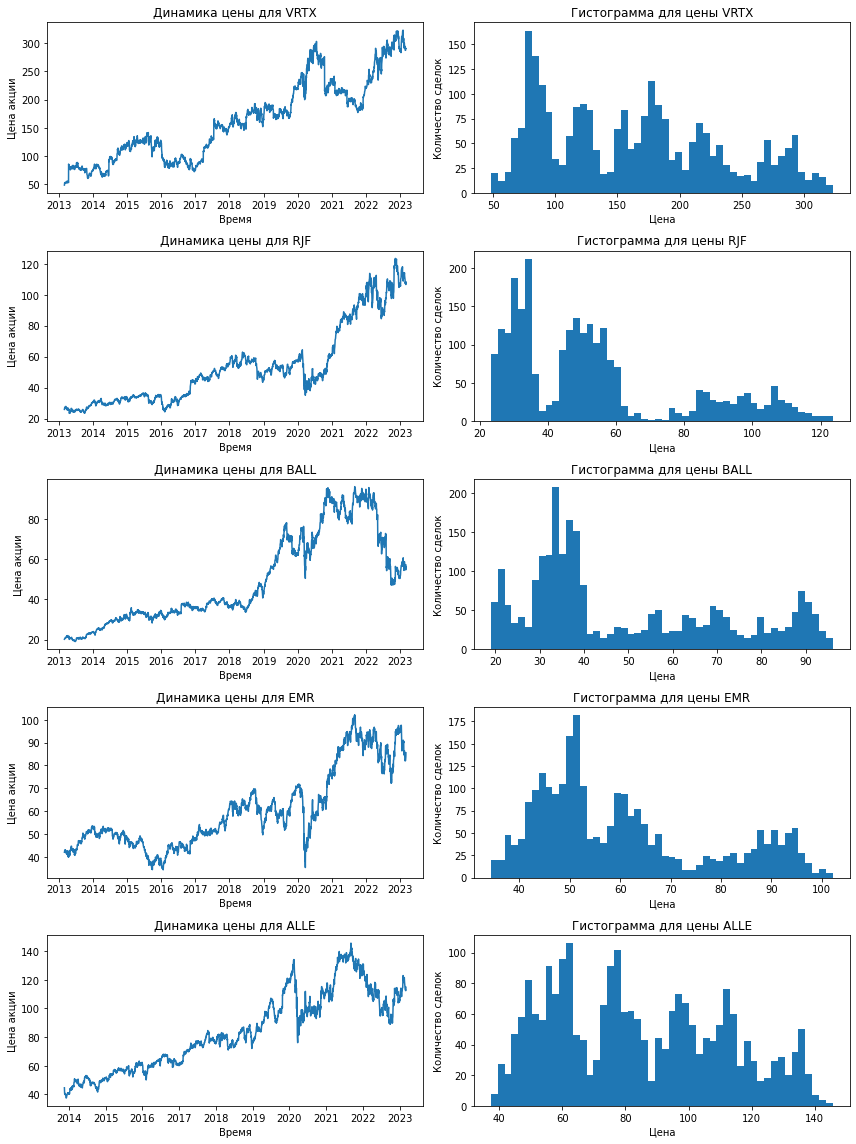

In [48]:
tickers = random.sample(list(df_prices.columns), k=5)

fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(12, 16))

for i, ticker in enumerate(tickers):
    prices = df_prices[ticker]

    axs[i, 0].plot(prices)
    axs[i, 0].set_title(f"Динамика цены для {ticker}")
    axs[i, 0].set_xlabel("Время")
    axs[i, 0].set_ylabel("Цена акции")

    axs[i, 1].hist(prices, bins=50)
    axs[i, 1].set_title(f"Гистограмма для цены {ticker}")
    axs[i, 1].set_xlabel("Цена")
    axs[i, 1].set_ylabel("Количество сделок")

plt.tight_layout()
plt.show()

###

а) Распределение стоимости акций НЕ похоже на нормальное - нигде не наблюдается симметричного колокола


б) Судя по графикам динамики цен на акции, крайние 10 лет рынок рос, драматических падений, за исключением пандемии коронавирусной инфекции, не наблюдалось. Некоторые бумаги отреагировали на возрастание геополитической напряженности в связи с последствиями действий в 2022 году

###

__д) [5 баллов]__ Найдите медианную цену акций за прошедший год (НЕ 10 лет) для каждого тикера. Сделайте `left join` таблицы с медианными ценами и таблицы с секторами экономики. Найдите для каждого сектора $95\%$ квантиль медианной цены.

In [156]:
df_medians = df_prices.loc[(df_prices.index >= '2022-03-03')].median().to_frame(name='Median Price')

df_merged = df_medians.join(df_inf.set_index('Symbol')['GICS Sector'], how='left')

quantiles = df_merged.groupby('GICS Sector')['Median Price'].quantile(0.95)

quantiles

GICS Sector
Communication Services     260.003003
Consumer Discretionary    1763.130005
Consumer Staples           243.992062
Energy                     165.014986
Financials                 350.159805
Health Care                523.568919
Industrials                432.061172
Information Technology     406.481459
Materials                  289.814917
Real Estate                308.903888
Utilities                  140.342722
Name: Median Price, dtype: float64

## 1.2 Риск и доходность

__е) [5 баллов]__ Финансовые продукты описываются двумя характеристикам – __доходностью__ и __риском.__ Доходность – это процентное изменение стоимости за некоторый промежуток времени. Мы будем работать с доходностями за день: 

$$
R_t = \frac{P_t - P_{t-1}}{P_{t-1}}
$$

Перейдите к доходностям для всей таблицы `df_prices`. Для того, чтобы посчитать разность между каждой строкой таблицы и предыдущей строкой, используйте команду `.diff()`. Чтобы сдвинуть все строки на одну вниз, используйте команду `shift(1)`.  

Поделите результат работы команды `diff` на результат работы команды `shift`. Обратите внимание, что в первой колонке теперь все значения `NaN`, так как мы не можем посчитать доходность для самого первого дня. Удалите из таблицы эту строку. 

In [54]:
df_r = df_prices.diff() / df_prices.shift(1)
df_r = df_r.drop(df_prices.index[0])
df_r

,A,AAL,AAP,AAPL,ABBV,ABC,ABNB,ABT,ACGL,ACN,...,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZM,ZS,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2013-03-06,0.013596,0.037010,-0.010006,-0.012710,0.006132,0.004350,NaN,-0.011537,0.001207,0.006370,...,-0.000558,0.006665,0.031283,0.009201,-0.007121,-0.001783,0.023673,NaN,NaN,-0.012832
2013-03-07,0.000231,0.017159,0.000525,0.011559,-0.006624,-0.008251,NaN,0.004669,0.013869,0.002067,...,-0.009491,0.005912,-0.032038,0.005081,-0.005313,-0.003796,0.007177,NaN,NaN,0.020975
2013-03-08,-0.005087,0.006748,0.008135,0.002648,-0.004001,0.008319,NaN,0.007262,0.003965,0.010056,...,0.002931,0.004701,0.001057,0.006989,0.006810,0.009413,0.001584,NaN,NaN,-0.013599
2013-03-11,-0.005112,0.014075,0.008980,0.014245,0.008838,0.001444,NaN,0.007208,0.003555,-0.000638,...,0.002136,0.002807,0.011607,0.001772,0.004510,0.009547,0.013043,NaN,NaN,0.002640
2013-03-12,-0.004439,0.024455,-0.002193,-0.021559,-0.013273,0.002060,NaN,0.001432,-0.000197,-0.003576,...,0.000000,-0.002567,-0.007998,0.013119,0.006073,0.001100,-0.006243,NaN,NaN,-0.010533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-27,0.006940,0.004499,0.012820,0.008248,0.010281,-0.012234,0.006108,-0.006868,0.000578,-0.001051,...,-0.001806,0.006408,0.001465,-0.002050,0.004890,0.014764,0.002387,-0.002841,0.007335,-0.005170
2023-02-28,-0.001477,0.022393,0.030790,-0.003448,-0.002463,-0.006831,-0.002024,0.019545,0.011415,-0.002629,...,-0.005789,0.101881,0.000975,0.004661,0.004623,0.013570,0.004564,0.011801,-0.005234,0.009246
2023-03-01,-0.031415,0.003129,-0.042357,-0.014246,0.008902,0.006107,-0.019873,-0.008750,0.013857,-0.007381,...,0.008916,-0.018650,-0.015197,-0.007550,-0.014451,0.006961,-0.003556,-0.066631,-0.020663,0.003413


Постройте для 5 случайно выбранных тикеров картинку с динамикой доходностей, гистограмму доходностей и ящики с усами. Ответьте на следующие вопроcы:

- Имеют ли доходности по акциям нормальное распределение? 
- Видно ли по ящику с усами, что в данных довольно много выбросов? 

__Ответ:__ 

###

а) Судя по гистограмме, доходности по акциям напоминают нормальное распределение, но не соответствуют его характеристикам, поэтому так сказать нельзя

б) За выбросы будем считать точки, выходящие за левые / правые границы ("усы"). По графику видно, что таких точек довольно много

###

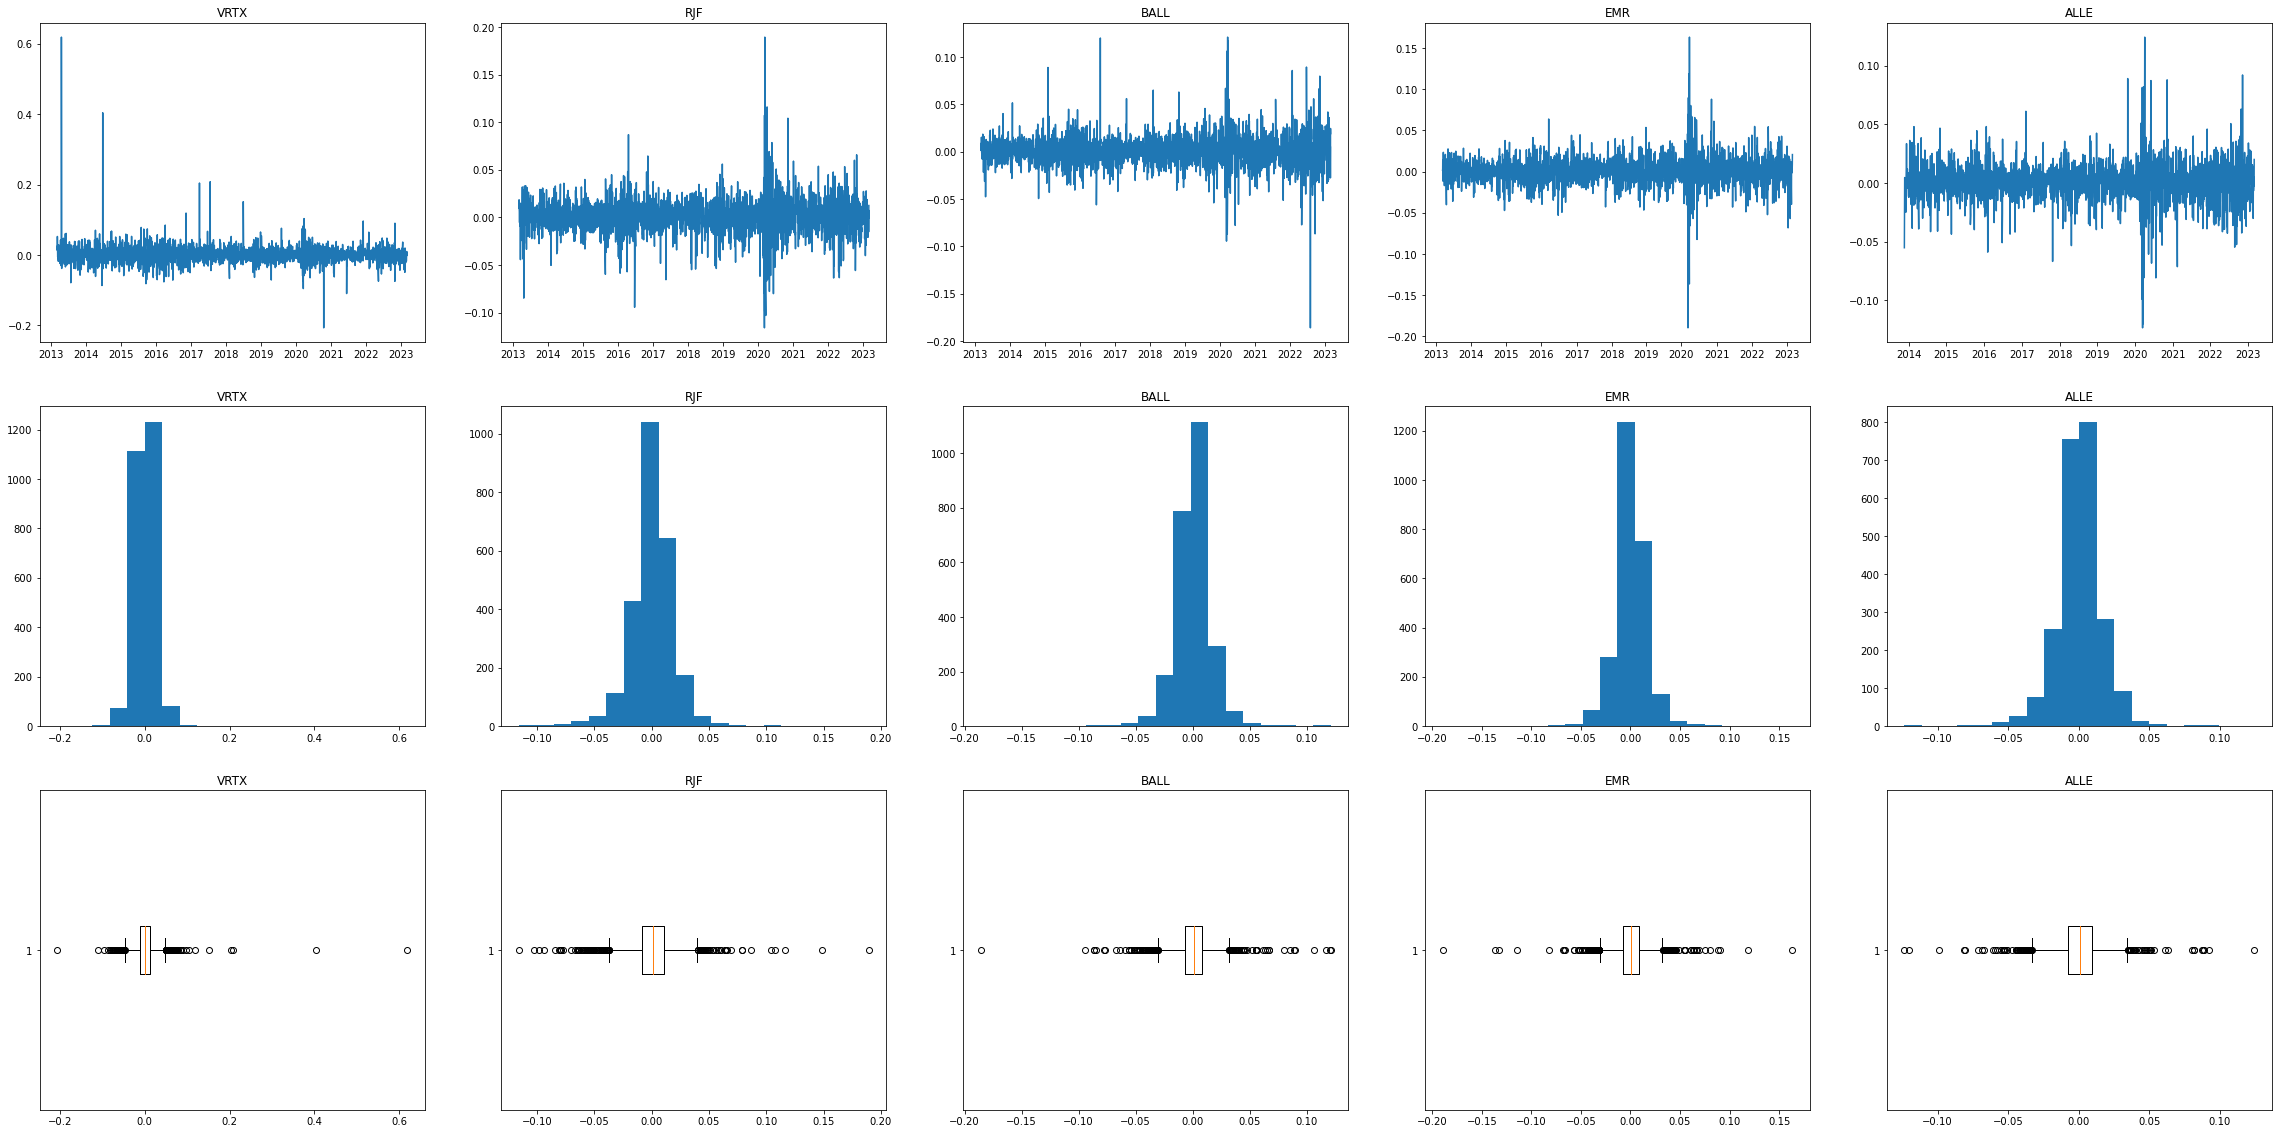

In [62]:
fig, axs = plt.subplots(3, 5, figsize=(40, 20))

for i, ticker in enumerate(tickers):

    axs[0, i].plot(df_r.index, df_r[ticker])
    axs[0, i].set_title(ticker)

    axs[1, i].hist(df_r[ticker], bins=20)
    axs[1, i].set_title(ticker)

    axs[2, i].boxplot(df_r[ticker].dropna().values, vert=False)
    axs[2, i].set_title(ticker)

Чтобы посмотреть, насколько сильно распределение отличается от нормального, можно вспользоваться диаграммой квантиль-квантиль. На картинке ниже видно, что центр распределения похож на нормальное, а квантили на хвостах отличаются от нормальных в более тяжёлую сторону. 

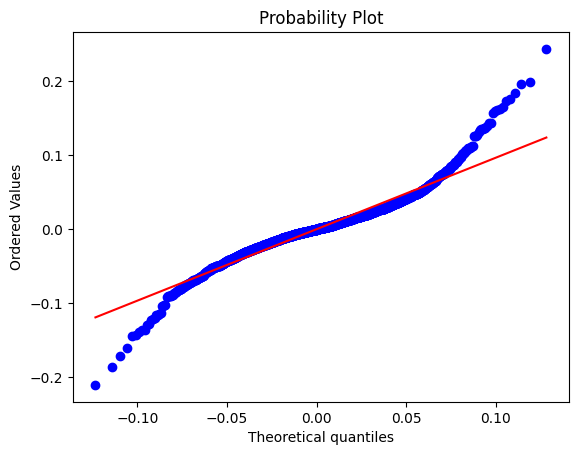

In [19]:
ax = plt.subplot(111)
x = df_r['TSLA'].values
sts.probplot(x, dist="norm", sparams=(x.mean(), x.std()), plot=ax);

__ё) [10 баллов]__  Без буквы `ё` никуда, скажут нам [Пафнутий Чебышёв](https://ru.wikipedia.org/wiki/%D0%A7%D0%B5%D0%B1%D1%8B%D1%88%D1%91%D0%B2,_%D0%9F%D0%B0%D1%84%D0%BD%D1%83%D1%82%D0%B8%D0%B9_%D0%9B%D1%8C%D0%B2%D0%BE%D0%B2%D0%B8%D1%87) и [Лёв Толстой](https://arzamas.academy/special/ruslit/writers/tolstoy).  

Разобьём выборку на обучающую и тестовую. Первые 4 года войдут в обучающую выборку, последний год в тестовую. Мы будем оценивать рискованность и доходность разных активов на обучающей выборке, а затем смотреть, насколько хорошо мы это сделали на тестовой.

In [64]:
df_train = df_r[df_r.index  < '2022-03-03']
df_test = df_r[df_r.index  >= '2022-03-03']

In [230]:
df_train

,A,AAL,AAP,AAPL,ABBV,ABC,ABNB,ABT,ACGL,ACN,...,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZM,ZS,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2013-03-06,0.013596,0.037010,-0.010006,-0.012710,0.006132,0.004350,NaN,-0.011537,0.001207,0.006370,...,-0.000558,0.006665,0.031283,0.009201,-0.007121,-0.001783,0.023673,NaN,NaN,-0.012832
2013-03-07,0.000231,0.017159,0.000525,0.011559,-0.006624,-0.008251,NaN,0.004669,0.013869,0.002067,...,-0.009491,0.005912,-0.032038,0.005081,-0.005313,-0.003796,0.007177,NaN,NaN,0.020975
2013-03-08,-0.005087,0.006748,0.008135,0.002648,-0.004001,0.008319,NaN,0.007262,0.003965,0.010056,...,0.002931,0.004701,0.001057,0.006989,0.006810,0.009413,0.001584,NaN,NaN,-0.013599
2013-03-11,-0.005112,0.014075,0.008980,0.014245,0.008838,0.001444,NaN,0.007208,0.003555,-0.000638,...,0.002136,0.002807,0.011607,0.001772,0.004510,0.009547,0.013043,NaN,NaN,0.002640
2013-03-12,-0.004439,0.024455,-0.002193,-0.021559,-0.013273,0.002060,NaN,0.001432,-0.000197,-0.003576,...,0.000000,-0.002567,-0.007998,0.013119,0.006073,0.001100,-0.006243,NaN,NaN,-0.010533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-24,0.017064,0.019231,0.020376,0.016680,-0.010153,-0.011544,0.054785,0.012537,-0.007777,0.009612,...,-0.012635,0.015518,-0.005105,-0.001892,0.007342,0.040171,-0.039306,0.057202,0.100167,0.020796
2022-02-25,0.043543,0.029481,0.023704,0.012966,0.029394,0.029450,-0.020030,0.031082,0.035053,0.020053,...,0.026913,0.042822,0.036830,0.019446,0.026077,0.006597,0.060027,-0.012995,-0.157681,0.019691
2022-02-28,-0.025200,-0.012027,-0.005302,0.001638,-0.011836,0.004298,-0.023212,-0.014623,-0.009045,-0.020123,...,0.007451,-0.077526,-0.021775,-0.009214,0.003867,-0.011314,-0.001409,0.058091,0.077981,-0.005444


__Все расчёты ниже делайте по обучающей выборке.__ 

Посчитайте для всех компаний на обучающей выборке среднюю доходность (просто сделайте `.mean()` за весь период). Найдите 10 самых доходных компаний и 10 самых убыточных.  Есть ли среди самых доходных компаний Тесла? :) 

In [67]:
R = df_train.mean()

print('10 самых доходных компаний:')
display(R.sort_values()[-10:][::-1])

print('10 самых убыточных компаний:')
display(R.sort_values()[:10])

10 самых доходных компаний:


CEG     0.006477
LCID    0.004682
MRNA    0.003882
GFS     0.003782
DDOG    0.003149
CARR    0.003140
ENPH    0.002918
ZS      0.002762
TSLA    0.002746
CRWD    0.002606
dtype: float64

10 самых убыточных компаний:


RIVN   -0.005722
VTRS   -0.000168
KHC    -0.000037
GE      0.000021
IBM     0.000060
LUMN    0.000060
KMI     0.000071
SLB     0.000087
BEN     0.000105
WBD     0.000149
dtype: float64

In [68]:
'TSLA' in R.sort_values()[-10:]

True

Один из способов измерить, насколько ценная бумага рискованная -  использовать стандартное отклонение. Посчитайте для всех компаний стандартное отклонение доходности. Найдите 10 самых рискованных компаний и 10 самых безрисковых.  Есть ли среди самых рискованных компаний Тесла? :) 

In [69]:
STD = df_train.std()

print('10 самых рискованных компаний:')
display(STD.sort_values()[-10:][::-1])

print('10 самых безрисковых компаний:')
display(STD.sort_values()[:10])

10 самых рискованных компаний:


RIVN    0.072406
LCID    0.066841
ENPH    0.052601
MRNA    0.052030
PDD     0.045639
ZM      0.042788
GFS     0.041315
SEDG    0.040310
CRWD    0.039878
DDOG    0.039034
dtype: float64

10 самых безрисковых компаний:


VZ      0.011099
JNJ     0.011255
KO      0.011309
PG      0.011339
RSG     0.011408
WM      0.011432
PEP     0.011443
CL      0.011778
MMC     0.012117
COST    0.012303
dtype: float64

In [70]:
'TSLA' in STD.sort_values()[-10:]

False

Обычно инвесторы принимают решение покупать бумагу к себе в портфель, отталкиваясь от того какие соотношения доходность/риск существуют на рынке. Создайте таблицу `df_result`. Запищите туда три колонки: тикер, доходность и стандартное отклонение.

In [81]:
df_result = pd.DataFrame(index=df_r.columns.values)
df_result['std'] = STD
df_result['r'] = R


df_result

,std,r
A,0.015556,0.000808
AAL,0.031476,0.000579
AAP,0.020050,0.000659
AAPL,0.017579,0.001268
ABBV,0.017331,0.000925
...,...,...
ZBRA,0.023282,0.001256
ZION,0.020683,0.000733
ZM,0.042788,0.001823
ZS,0.037999,0.002762


Постройте для наших ценных бумаг диаграмму рассеивания, на которой будет видно, где по своей доходности и риску находится какая ценная бумага.

Отдельно отметьте на картинке точку, соотвествующую Тесле так, чтобы её было видно. Можно ли купить какую-то другую бумагу, которая обладает примерно такой же доходностью как тесла, но при этом её риск меньше? 

__Ответ:__ (см ниже)

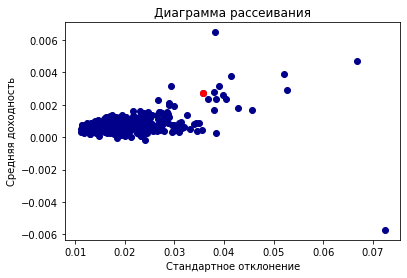

In [75]:
tesla = df_result.loc[(df_result.index == 'TSLA')]

fig, ax = plt.subplots()
ax.scatter(x='std', y='r', c='darkblue', data=df_result)
ax.scatter(x='std', y='r', c='red', data=tesla) # красная точка - тесла

ax.set_xlabel('Стандартное отклонение');
ax.set_ylabel('Средняя доходность');
ax.set_title('Диаграмма рассеивания');

Определим, можно ли купить какую-то другую бумагу  𝑋 , которая обладает примерно такой же доходностью как тесла, но при этом её риск меньше, для чего найдём ближашую бумагу с параметрами  0.9𝑅 TSLA ⩽ 𝑅𝑋 ⩽ 1.1𝑅 TSLA ,  STD𝑋 < STDTSLA  (доходность  ±  10%)

In [76]:
std_tesla, r_tesla = tesla.values[0]
df_result.loc[(df_result['std'] < std_tesla) &
              (df_result['r'] >= 0.9*r_tesla) &
              (df_result['r'] <= 1.1*r_tesla)]

,r,std


Пусто

Чем больше риск, тем выше потенциально может оказаться доходноcть. __Но при этом мы с более высокой вероятностью можем уйти в убыток.__ 

__ж) [5 баллов]__  Надо понимать, что стандартное отклонение чувствительно к выбросам. Поэтому в качестве меры риска часто рассматривают $\text{VaR}$. 

__Value-at-Risk__ — одна из самых распространенных форм измерения финансовых рисков. Общепринято обозначается $\text{VaR}$. Еще его часто называют статистика $16:15$, такое название он получил потому, что $16:15$ – это время, в которое он якобы должен лежать на столе главы правления банка JPMorgan. (В этом банке данный показатель был впервые введен с целью повышения эффективности работы с рисками).

__Value-at-Risk__ на каком-либо уровне (скажем, $5\%$) – это просто квантиль уровня $5\%$. То есть это такая доходность, что в $95\%$ случаев у нас дела будут лучше.

Посчитайте $5\%$ $\text{VaR}$ по всем ценным бумагам. Для этого используйте метод `quantile()`. Найдите 10 самых рискованных компаний и 10 наименее рискованных компаний с точки зрения этого показателя. Запишите `VaR` в табличку `df_result` отдельной колонкой (нужно сделать `join`). Домножьте значения VaR на -1, чтобы интерпретировать числа как потери.  

In [188]:
VaR = df_train.quantile(0.05)
VaR = VaR * (-1)
VaR

A       0.025164
AAL     0.044087
AAP     0.026499
AAPL    0.025629
ABBV    0.024926
          ...   
ZBRA    0.030612
ZION    0.030714
ZM      0.061953
ZS      0.055926
ZTS     0.022609
Name: 0.05, Length: 520, dtype: float64

In [191]:
VaR.name = 'VaR'
df_result = df_result.join(VaR)
df_result.head()

,std,r,VaR
A,0.015556,0.000808,0.025164
AAL,0.031476,0.000579,0.044087
AAP,0.020050,0.000659,0.026499
AAPL,0.017579,0.001268,0.025629
ABBV,0.017331,0.000925,0.024926


In [192]:
df_result.sort_values(by='VaR')[::-1][:10] # наиболее рискованные

,std,r,VaR
RIVN,0.072406,-0.005722,0.106831
LCID,0.066841,0.004682,0.075715
ENPH,0.052601,0.002918,0.073849
MRNA,0.052030,0.003882,0.072876
PDD,0.045639,0.001691,0.065768
ZM,0.042788,0.001823,0.061953
GFS,0.041315,0.003782,0.060479
CEG,0.038244,0.006477,0.058496
DDOG,0.039034,0.003149,0.056923
SEDG,0.040310,0.002359,0.055984


In [193]:
df_result.sort_values(by='VaR')[::-1][-10:] # наименее рискованные 

,std,r,VaR
CL,0.011778,0.000284,0.016865
VZ,0.011099,0.000295,0.016457
SO,0.013247,0.000425,0.016385
JNJ,0.011255,0.000507,0.015890
PEP,0.011443,0.000513,0.015868
MCD,0.012586,0.000596,0.015866
RSG,0.011408,0.000767,0.015696
KO,0.011309,0.000402,0.015495
PG,0.011339,0.000487,0.015249
WM,0.011432,0.000776,0.015233


Постройте для наших ценных бумаг диаграмму рассеивания, на которой будет видно, где по своей доходности и риску находится какая ценная бумага. Отдельно отметьте теслу. В качестве меры риска используйте $\text{VaR}.$

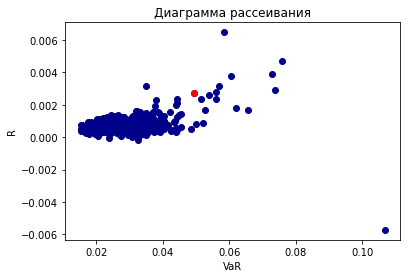

In [194]:
tesla = df_result.loc[(df_result.index == 'TSLA')]

fig, ax = plt.subplots()
ax.scatter(x='VaR', y='r', c='darkblue', data=df_result)
ax.scatter(x='VaR', y='r', c='red', data=tesla)

ax.set_xlabel('VaR')
ax.set_ylabel('R')
ax.set_title('Диаграмма рассеивания');

$\text{VaR}$ хорош тем, что описывает именно ту часть распределения, которую мы боимся. Но $\text{VaR}$ - это лучшее из $5\%$ худших случаев. А что лежит в тех $5\%$ худших случаев?…

__Expected shortfall__ - это среднее значение по всем тем точкам, что оказались хуже $\text{VaR}$, То есть среднее по худшим $5\%$. Эта метрика показывает что в среднем произойдёт с нашей доходностью в этих самых плохих $5\%$ случаев. 

- Рассчитаете $\text{ES}$ для Теслы
- Предположим, что мы вложили в Теслу $1000$ долларов в один из самых неудачных дней. Сколько в среднем денег мы потеряем от этой $1000$ долларов к концу дня? 
- Посчитайте, сколько денег мы заработаем в $5\%$ лучших случаев к концу дня? 

__Важно:__ $\text{VaR}$ и $\text{ES}$ в этом пункте - отрицательные числа.

In [201]:
var_tsla = df_train['TSLA'].quantile(0.05)
tsla_es = df_train.loc[df_train['TSLA'] < var_tsla, 'TSLA'].mean()
tsla_es

-0.07554044469806388

In [202]:
tsla_es * 1000 # потери от вложений в худшие дни 

-75.54044469806388

In [228]:
var_tsla = df_train['TSLA'].quantile(0.95)
tsla_es = df_train.loc[df_train['TSLA'] < var_tsla, 'TSLA'].mean()
tsla_expected_profit = df_train.loc[df_train['TSLA'] >= var_tsla, 'TSLA'].mean()

tsla_expected_profit * 1000 # прибыль в лучшие дни 

93.9084648765163

Посчитайте $\text{ES}$ по всем ценным бумагам. Домножьте получившееся значение на (-1). Запишите его отдельным столбцом в `df_result` (нужно сделать `join`)

In [311]:
es_list = []
for col in df_train.columns:
    var = df_train[col].quantile(0.05)
    es = -1 * df_train.loc[df_train[col] < var, col].mean()
    es_list.append(es)
    

df_result.round(3)
df_result = df_result.sort_values(by='ES', ascending=False)
df_result.iloc[:, 2:].to_csv('var_result.csv', index=False)

1. Округлите данные до 3-х знаков после запятой `df_result.round(3)`
2. Отсортируйте таблицу `df_result` по колонке `ES` по убыванию
3. Запишите получившиеся результаты в таблицу с колонками `'Ticker', 'std', 'r', 'VaR', 'ES'` в файл `var_result` Таблица должна быть без индексов. Последняя строка не должна быть пустой. Колонки друг от друга отделяются запятыми. Порядок колонок должен быть именно таким.
4. Отправьте свой файл `var_result.csv` в контест (https://contest.yandex.ru/contest/47242/problems/A) и прикрепите/укажите ниже ваш никнейм и ссылку на успешную посылку.


asraff@edu.hse.ru

85033322

> __Дисклеймер:__ Успешная посылка в контесте является обязательным условием получения полного балла за этот (и следующий) пункт. Если добиться успешной посылки не удастся, баллы будут выставляться на усмотрение проверяюшего.

> При этом ОК в контесте не гарантирует полный балл. Оценка всё равно может быть снижена в случае обнаружения неэффективностей или ошибок в коде. Если вы сдадите в AnyTask очевидно неработающий код или ноутбук без кода, но при этом в контест будет сдан корректный файл, то это будет расцениваться как плагиат. На всякий случай просим вас сдать вместе с ноутбуком файл res_fall.csv в anytask.

__Какая метрика лучше?__

Никакая. Все рассуждения о риске – это попытки уложить функцию распределения доходностей в одно единственное число. Поэтому информация потеряется и все метрики будут не идеальны. А к чему это приведет, можно прочитать в книге Скотта Паттерсона ["Кванты. Как волшебники от математики заработали миллиарды и чуть не обрушили фондовый рынок."](https://disk.yandex.ru/i/ryFfPZ8_1uTO6g) Тем не менее, какие-то цифры, на которые можно было бы ориентироваться при принятии решений необходимы.

## 1.3 VaR-кривая 

__з) [10 баллов]__ Мы что-то насчитали. А это вообще работает? Давайте проверим на тестовой выборке для Теслы.

In [215]:
var_tsla = df_train['TSLA'].quantile(0.05)
df_tsla = df_test['TSLA'].reset_index()
df_tsla['is_bad'] = (df_test['TSLA'].values < var_tsla)
df_tsla['is_bad'].mean()

0.14285714285714285

На тестовой выборке мы пробили для Теслы VaR в 14% случаев вместо 5%. Это очень плохой результат. Наша оценка риска оказалась провальной. Можно с помощью теста Купика проверить значимость этих отличий, но мы пока что не будем это делать. Отложим эту историю до домашки про гипотезы.

Нарисуем VaR-кривую.

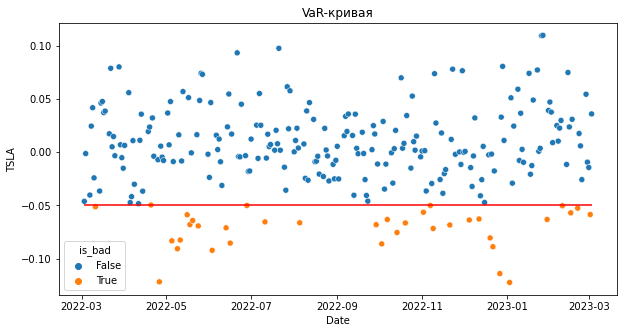

In [216]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df_tsla, x='Date',y='TSLA', hue='is_bad')
plt.hlines(var_tsla, df_tsla.Date.min(), df_tsla.Date.max(), color='red')
plt.title('VaR-кривая');

А почему все это плохо? А потому, что мы не расширяем обучающую выборку, то есть не учитываем новую информацию. Мы один раз предсказали $\text{VaR}$ и так с ним и сидим. Давайте сделаем по-другому.

- Выделите $N$ точек (первые 4 года), найдите по ним $\text{VaR}$ для $N+1$ дня. Потом сдвинем $N$ точек вправо и найдём $\text{VaR}$ по ним для точки $N + 2$. И так далее. Тогда $\text{VaR}$ будет в каждой точке разный. 
- Нарисуйте получившуюся для Теслы кривую на картинке.
- Посчитайте как часто мы пробивали $\text{VaR}$ на практике, улучшилась ли цифра?

In [302]:
tsla = pd.DataFrame(df_r['TSLA'])

distance = df_train.shape[0] # 9 лет и 252 торговых дня 
historical_var = []
a = 5   #уровень значимости
for i in range(0,len(tsla) - distance):
        b = tsla[i:distance+i]
        historical_var.append(b.quantile(a/100))

test_tsla = np.array(df_test['TSLA'])
history_tsla = np.array(historical_var)
breakdown = (test_tsla < history_tsla).mean()
breakdown

0.13592844545225496

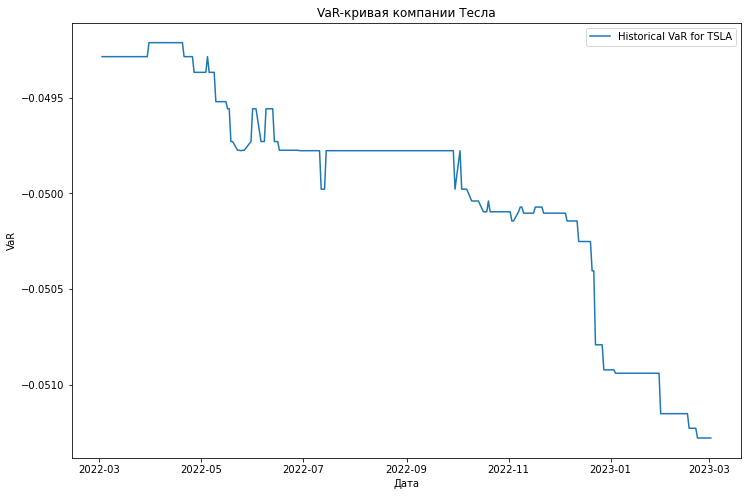

In [310]:
fig, ax =  plt.subplots(1,1,figsize = (12,8))
ax.plot(df_test['TSLA'].index[0:251], history_tsla[:251], label = 'Historical VaR for TSLA')
plt.title('VaR-кривая компании Тесла')
plt.xlabel('Дата')
plt.ylabel('VaR')
ax.legend()
plt.show()

Мы пробили значение VaR в 13,5% случаев, значение немного улучшилось

Способ оценки $\text{VaR},$ который мы использовали, называется **историческим.** Кроме него есть довольно много других способов. Например:

- можно попробовать подогнать какое-то распределение под данные и взять его квантиль
- можно попробовать обучить модель машинного обучения предсказывать соотвествующий квантиль
- можно обучить какую-нибудь модель на временном ряде
- можно попробовать отдельно моделировать хвосты распределения

Часть способов более подробно можно [посмотреть в лекциях Ильи Езепова.](https://rpubs.com/iezepov) Они немного староваты, но хороши. 

__и) [бонусные 5 баллов]__

Разберитесь как работает какой-нибудь ещё метод оценки $\text{VaR}$ и реализуйте его. Сравните его работу с историческим методом на нескольких ценных бумагах из наших данных. Например, вы можете разобраться с [ОГРом](https://rpubs.com/iezepov/e502lec2) или [моделированием хвостов.](https://rpubs.com/iezepov/e502lec6) Весь код должен быть написан на питоне. Часть бонуса -- попытаться найти библиотеки для этого.

In [ ]:
# your code here
# [✖‿✖]

  ---------

# Часть 2: чековая

За задание можно получить $50$ баллов. Мы будем работать с покупками и чеками. Смотреть за корреляциями в покупках довольно полезно.

> В 1992 году группа по консалтингу в области ритейла компании Teradata под руководством Томаса Блишока провела исследование 1.2 миллиона транзакций в 25 магазинах для ритейлера Osco Drug (Drug Store — формат разнокалиберных магазинов у дома). После анализа всех этих транзакций самым сильным правилом получилось «Между 17:00 и 19:00 чаще всего пиво и подгузники покупают вместе». 

>К сожалению, такое правило показалось руководству Osco Drug настолько контринтуитивным, что ставить подгузники на полках рядом с пивом они не стали. Хотя объяснение паре пиво-подгузники вполне себе нашлось: когда оба члена молодой семьи возвращались с работы домой (как раз часам к 5 вечера), жены обычно отправляли мужей за подгузниками в ближайший магазин. И мужья, не долго думая, совмещали приятное с полезным — покупали подгузники по заданию жены и пиво для собственного вечернего времяпрепровождения.

Для работы будем использовать датасет о продуктовых корзинах: https://www.kaggle.com/heeraldedhia/groceries-dataset

- `id` - номер покупки (чека)
- `fielddate` - дата покупки
- `product` - что было куплено

In [83]:
df = pd.read_csv(groceries_url, sep=',')
df.columns = ['id', 'fielddate', 'product']
print(df.shape)
df.head()

(38765, 3)


,id,fielddate,product
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


## 2.1 Разогреваемся

__а) [10 баллов]__ Сколько всего уникальных заказов было сделано?

In [84]:
df['id'].unique().shape[0]

3898

Какие товары покупались чаще всего? Найдите топ-10 самых популярных товаров и изобразите частоту их покупок на столбиковой диаграмме. 

In [85]:
df_freq = df.groupby(by='product').size().reset_index(name='count')
df_top10 = df_freq.sort_values(by='count')[::-1][:10]
df_top10

,product,count
164,whole milk,2502
102,other vegetables,1898
122,rolls/buns,1716
138,soda,1514
165,yogurt,1334
123,root vegetables,1071
156,tropical fruit,1032
12,bottled water,933
130,sausage,924
30,citrus fruit,812


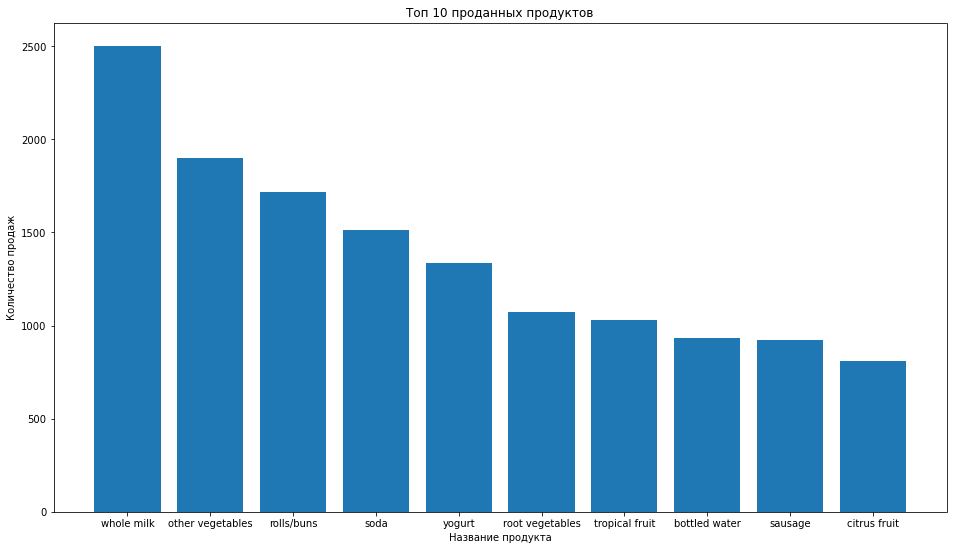

In [86]:
bars = df_top10['product']
height = df_top10['count']
x_pos = np.arange(len(bars))

plt.figure(figsize=(16,9))

plt.bar(x_pos, height)

plt.title("Топ 10 проданных продуктов")
plt.xlabel("Название продукта")
plt.ylabel("Количество продаж")
plt.xticks(x_pos, bars)

plt.show()

Визуализируйте как часто покупались товары с помощью [облака слов.](https://www.python-graph-gallery.com/wordcloud/) Для графика используйте все товары из датасета. 

In [91]:
!pip install wordcloud

     |████████████████████████████████| 160 kB 954 kB/s eta 0:00:01


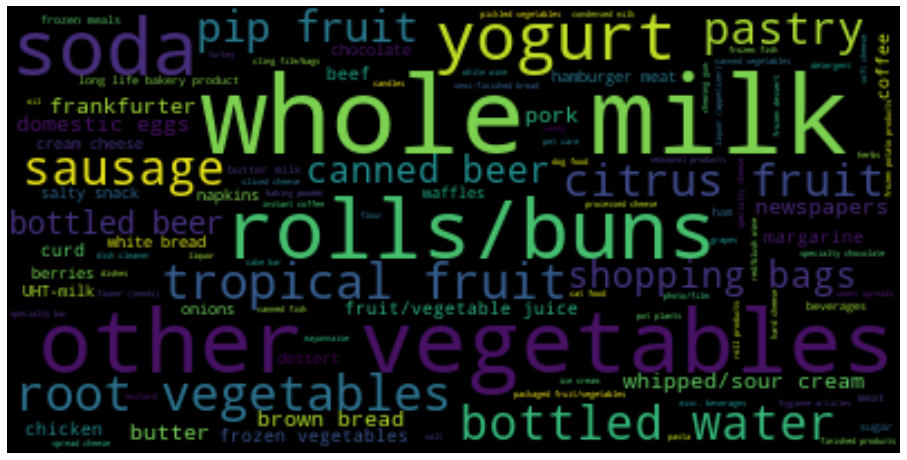

In [92]:
from wordcloud import WordCloud

wc = WordCloud().generate_from_frequencies(df_freq.set_index('product')['count'])

plt.figure(figsize=(16,9))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

__б) [10 баллов]__ Начнём анализировать совместные покупки товаров.

В таблице выше в каждой строке записана информация о покупке конкретного товара. Давайте сделаем табличку размера "число товаров" на "число покупок", чтобы понимать какие товары покупались вместе, а какие нет. 

По строкам отложите номера чеков. По столбцам отложите название продуктов. На пересечении должно стоять число товаров, купленное в этом чеке. Используйте для этого команду `pivot_table`.

In [93]:
cheques = pd.pivot_table(df, values='product',
                         index='id', columns='product',
                         aggfunc='count').fillna(0)

for col in cheques:
      cheques[col] = cheques[col].astype(int)

cheques

product,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
id,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,2,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


В нашей матрице огромное число нулей. Обычно такие матрицы называют разряжеными. Мы занимаем нулями кучу свободной памяти, которую мы могли бы не занимать, если бы хранили данные [в виде разреженных матриц.](https://cmdlinetips.com/2018/03/sparse-matrices-in-python-with-scipy/) У нас данные небольшие, поэтому мы забьём на неоптимальность и продолжим работать с ними в `pandas`.

Постройте матрицу корреляций Пирсона. Визуализируйте матрицу с помошью heatmap.

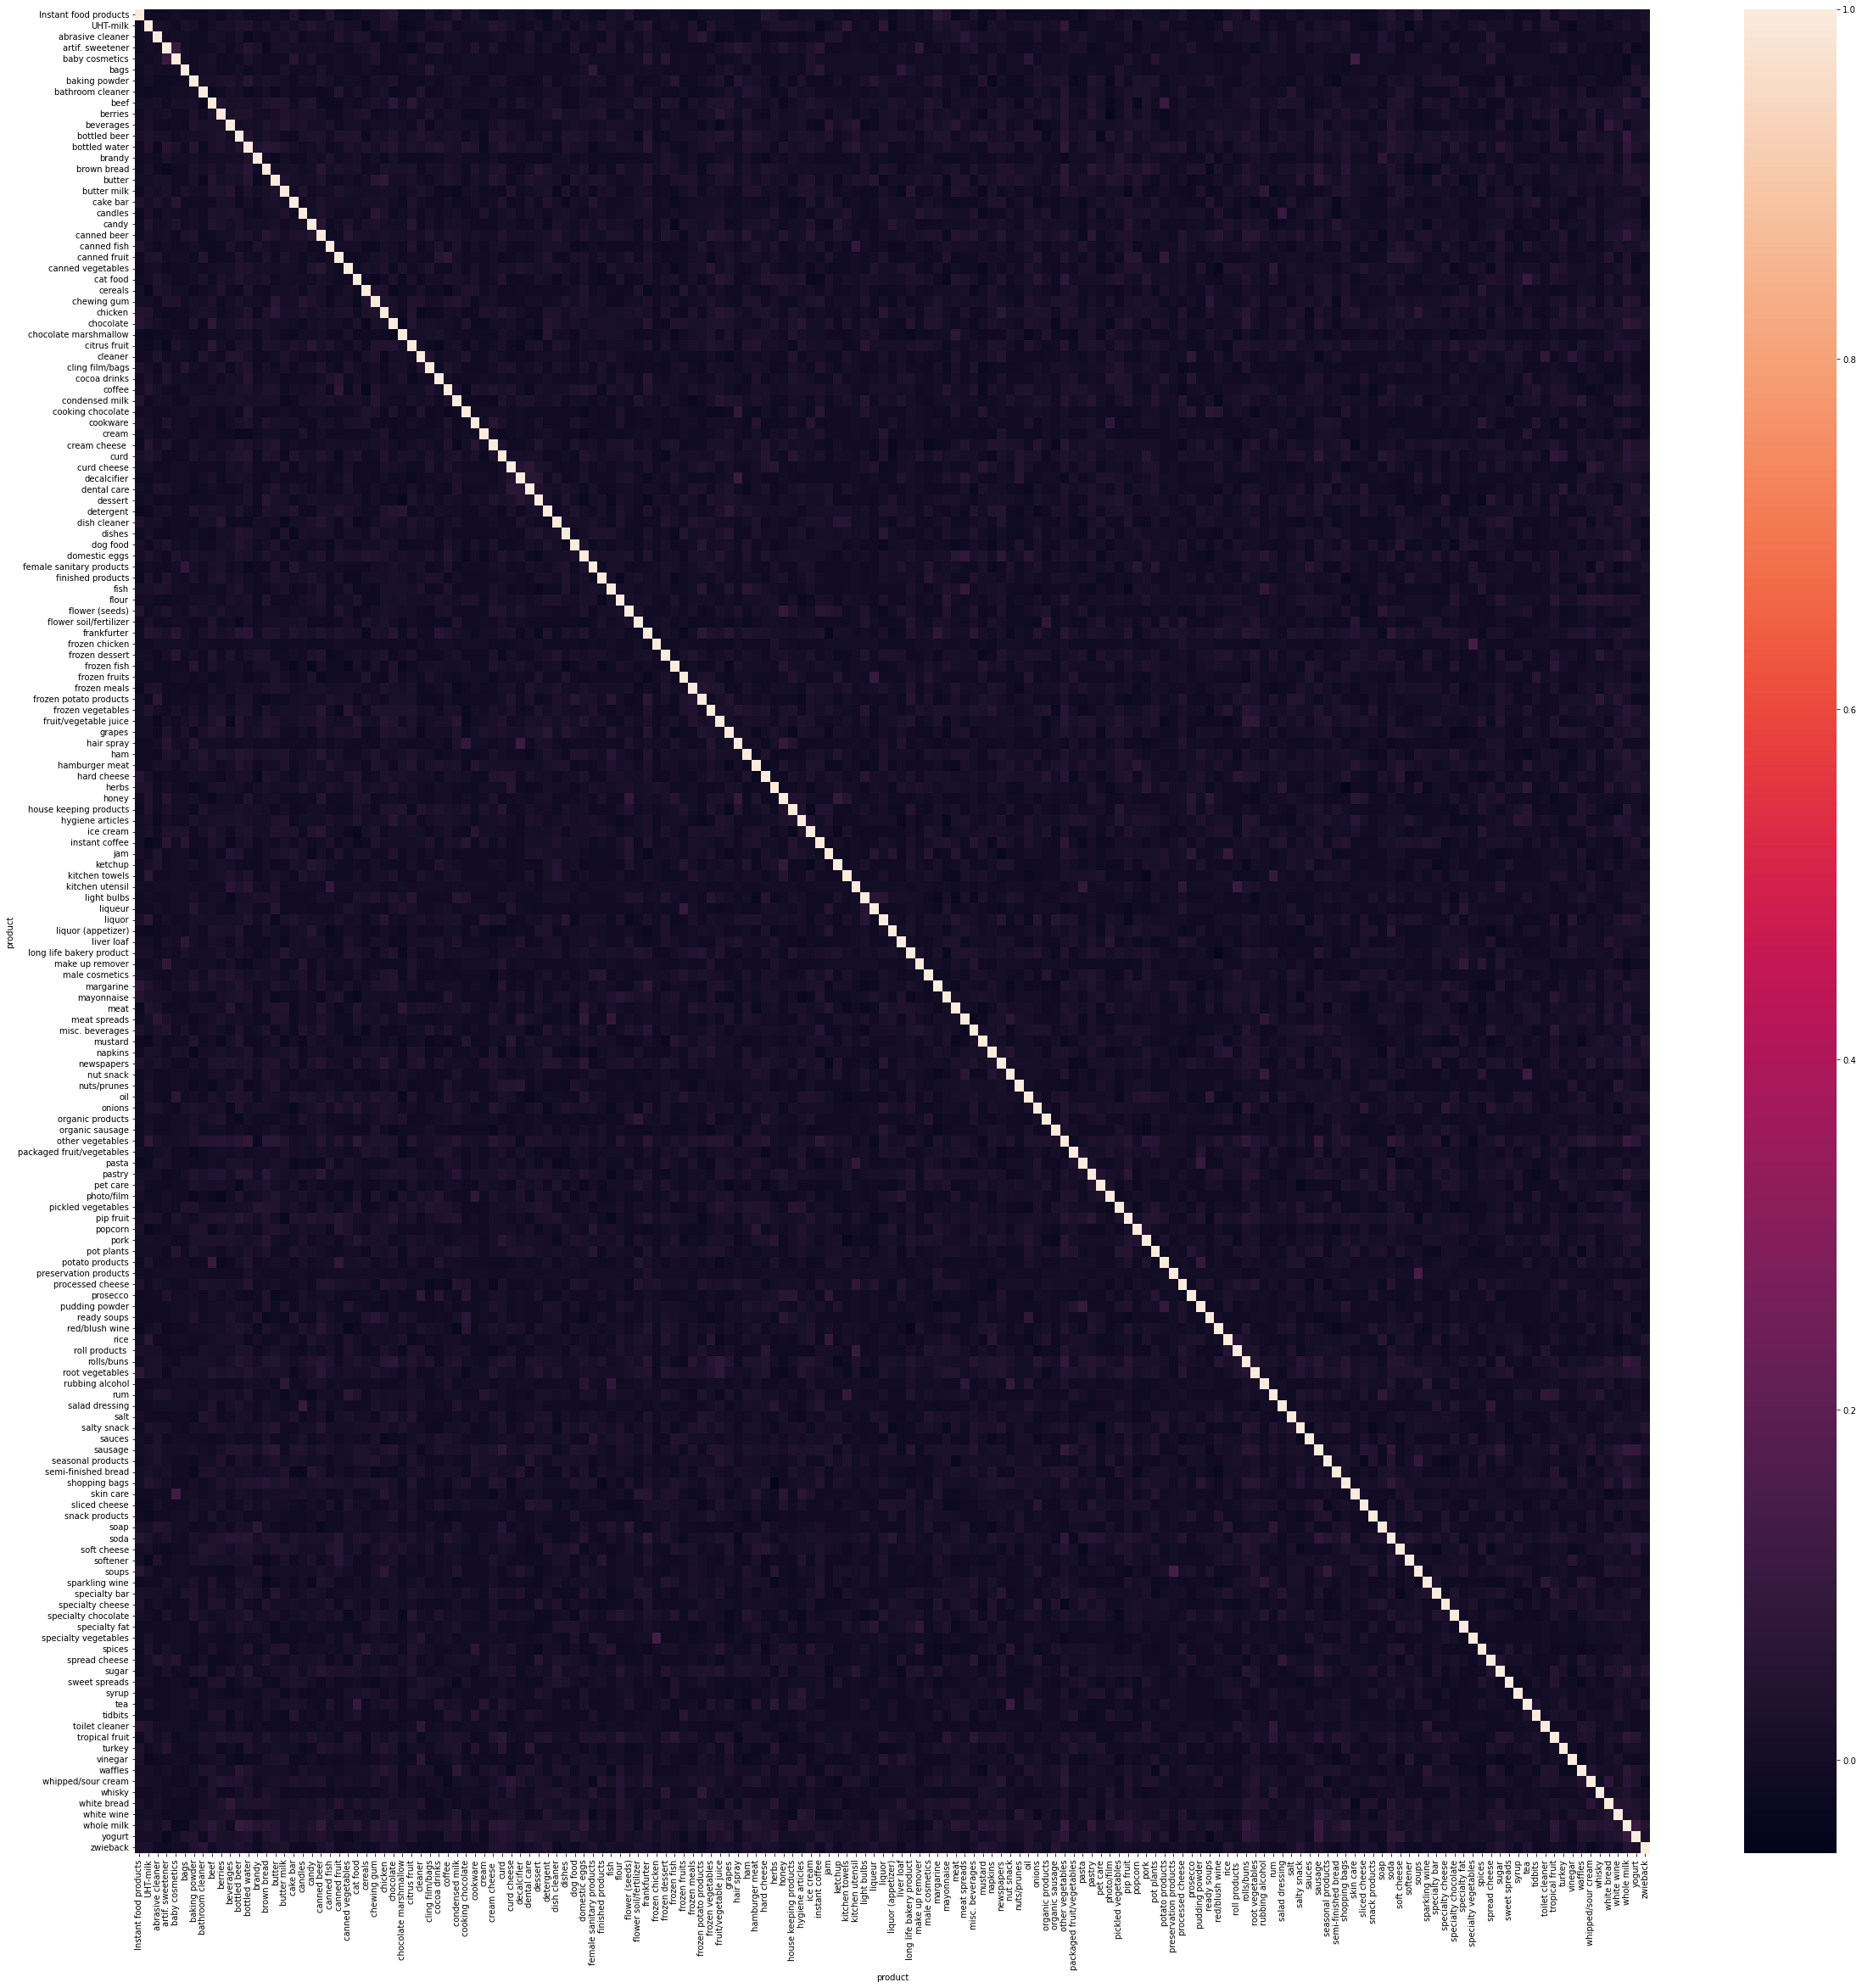

In [114]:
fig, ax = plt.subplots(figsize=(40, 40))
sns.heatmap(cheques_corr);

Какие продукты сильнее всего коррелируют с яйцами, `domestic eggs` (их чаще всего покупают вместе)? Какие продукты "мешают" купить яйца, то есть отрицательно коррелируют с их покупкой? 

In [94]:
cheques_corr = cheques.corr(method='pearson')
cheques_corr

product,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
product,,,,,,,,,,,,,,,,,,,,,
Instant food products,1.000000,-0.006936,-0.009420,-0.010825,-0.003470,-0.004007,-0.010419,-0.008275,0.005847,-0.014528,...,0.025355,0.021851,0.005348,0.014025,-0.005670,0.016640,0.002853,0.015981,0.005071,0.018221
UHT-milk,-0.006936,1.000000,0.013806,0.006105,-0.007877,0.018349,0.009462,-0.018785,0.002897,0.020801,...,-0.003803,-0.024466,0.009144,0.006618,-0.012871,-0.011550,0.009990,0.028747,0.006505,0.028753
abrasive cleaner,-0.009420,0.013806,1.000000,-0.006523,-0.002091,-0.002415,-0.013429,-0.004986,0.018970,0.001813,...,0.012922,-0.008507,-0.007390,0.002163,-0.003417,0.010777,0.000107,0.003558,0.008360,-0.009420
artif. sweetener,-0.010825,0.006105,-0.006523,1.000000,0.105251,-0.002775,-0.015432,-0.005730,-0.006645,0.016042,...,0.049392,-0.009776,0.010179,-0.006614,-0.003926,-0.006806,-0.018394,0.029591,-0.024397,-0.010825
baby cosmetics,-0.003470,-0.007877,-0.002091,0.105251,1.000000,-0.000889,-0.004947,-0.001837,0.014798,-0.007983,...,-0.003919,-0.003134,-0.007413,-0.011288,-0.001259,-0.008476,-0.005896,-0.021056,-0.000410,-0.003470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
white bread,0.016640,-0.011550,0.010777,-0.006806,-0.008476,-0.009789,-0.011195,0.005394,0.015850,0.030758,...,0.014921,0.001920,-0.000010,0.069757,0.004792,1.000000,0.046272,0.053497,0.030962,0.016640
white wine,0.002853,0.009990,0.000107,-0.018394,-0.005896,-0.006809,-0.010370,0.022577,0.015060,0.021670,...,-0.005083,0.028101,0.015072,0.000317,0.017039,0.046272,1.000000,0.032862,0.039600,-0.006953
whole milk,0.015981,0.028747,0.003558,0.029591,-0.021056,-0.024316,0.020192,0.032618,0.073856,0.028186,...,0.013874,-0.007158,0.069096,0.060338,0.039298,0.053497,0.032862,1.000000,0.103533,0.043075


In [98]:
[cheques_corr['domestic eggs'].sort_values()[::-1].index[i] for i in (1, -1)]

['meat spreads', 'pet care']

Какие два продукта коррелируют сильнее всего? 

In [99]:
product_1 = cheques_corr.replace(1.0, -1).max().sort_values()[::-1].index[0]
product_2 = cheques_corr[product_1].sort_values()[::-1].index[1]
print(f'Это {product_1} и {product_2} ({cheques_corr.replace(1.0, -1).max().sort_values()[::-1][0]})')

Это soups и preservation products (0.14346453108371238)


__Вопрос:__ почему корреляция пирсона это плохой способ измерить взаимосвязть между покупками?

__Ответ:__ если взаимосвязь между переменными не является линейной, то коэффициент корреляции Пирсона может давать неверные или недостаточные результаты. В случае покупок может быть множество факторов, которые влияют на их взаимосвязь, и некоторые из этих факторов могут быть нелинейными. Использование коэффициента корреляции Пирсона может дать неверные результаты или недостаточно информативно описывать связь между покупками.


## 2.2 Коэффициент корреляции Мэтьюса

__Коэффициент корреляции Мэтьюса__ — это мера силы взаимосвязи между двумя бинарными переменными. Для того чтобы его вычислить, необходимо использовать таблицу сопряженности

|        |  $0$   |  $1$   |
|:------:|:------:|:------:|
| $0$    |  $a$   |  $b$   |
| $1$    |  $c$   |  $d$   |

В строках таблицы сопряжённости находятся значения одного признака, по столбцам — второго, в каждой ячейке — количество объектов, на которых реализовалась эта пара. Коэффициент корреляции Мэтьюса вычисляется по данным из таблицы сопряжённости следующим образом:

$$
MCC(X_1, X_2) = \frac{a \cdot d - b \cdot c}{\sqrt{(a + b) \cdot (a + c) \cdot (b + d) \cdot (c + d)}}
$$

Точно так же, как и коэффициенты Пирсона и Спирмена, корреляция Мэтьюса лежит в диапазоне от $−1$ до $1.$ Нулевое значение соответсвуте отсутствию взаимосвязи между переменными. Значение $MCC(X_1, X_2) = 1$ соотвествует случаю, когда $X_1$ и $X_2$ полностью совпадают, то есть $b = c = 0$. Значение  $MCC(X_1, X_2) = -1$ соответствует случаю, когда каждое значение $X_1$ отличается от каждого значения $X_2$. 

Для категориальных переменных можно также считать коэффициент V-Крамера. Подробнее можно почитать про разные корреляции [в этом конспекте.](https://disk.yandex.ru/i/Znahvyg3mIrW9A)

__в) [10 баллов]__ 

1. Оставьте в таблице сопряжённости два значения. Нулевое, если товара не был в чеке и единичное, если был
2. Отфильтруйте из рассмотрения товары, которые встречались меньше, чем в 10 чеках (оставить то, что `>= 10`)
3. Посчитайте для каждой пары коэффициент корреляции Мэтьюса. Чтобы удобнее было перебрать все сочетания, используйте `combinations` из модуля `itertools`.
4. Запишите получившиеся результаты в таблицу с колонками `product_1, product_2, matthews_corrcoef`. 
5. Отсортируйте получившиеся пары по коэффициенту Мэтьюса от 1 к -1 и сохраните первые сто строк получившейся таблички в файл `result_matthews.csv` Таблица должна быть без индексов. Последняя строка не должна быть пустой. Колонки друг от друга отделяются запятыми.

In [102]:
conj = cheques.copy()
conj = cheques.applymap(lambda x: 1 if x > 0 else 0)

conj

product,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
id,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [104]:
counts = conj.sum(axis=0)
conj = conj.loc[:, counts >= 10]

conj

product,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baking powder,bathroom cleaner,beef,berries,beverages,bottled beer,...,tropical fruit,turkey,vinegar,waffles,whipped/sour cream,white bread,white wine,whole milk,yogurt,zwieback
id,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1001,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,1,0,1,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [105]:
from sklearn.metrics import matthews_corrcoef as mcc
from itertools import combinations

combs = list(combinations(conj.columns.values, 2))
ks = []

for col1, col2 in combs:
      ks.append(mcc(conj[col1], conj[col2]))

In [106]:
df_matthews = pd.DataFrame(np.concatenate((combs, np.array([ks]).T), axis=1),
                        columns=['product_1', 'product_2', 'matthews_corrcoef'])

df_matthews['matthews_corrcoef'] = df_matthews['matthews_corrcoef'].astype(float)
df_matthews.sort_values(by='matthews_corrcoef', ascending=False,
                     inplace=True, ignore_index=True)
display(df_matthews)
df_matthews.head(100).to_csv('result_matthews.csv', sep=',', encoding='utf-8', index=False)

,product_1,product_2,matthews_corrcoef
0,nut snack,tea,0.117578
1,flower (seeds),honey,0.095058
2,sausage,yogurt,0.094040
3,honey,ketchup,0.093365
4,whole milk,yogurt,0.093302
...,...,...,...
11776,pet care,salty snack,-0.033813
11777,kitchen towels,pork,-0.034400
11778,berries,photo/film,-0.034996
11779,long life bakery product,red/blush wine,-0.037910


Отправьте свой файл `result_mat.csv` в контест (https://contest.yandex.ru/contest/47242/problems/B/) и прикрепите/укажите ниже ваш никнейм и ссылку на успешную посылку.

asraff@edu.hse.ru

84648586


> __Дисклеймер:__ Успешная посылка в контесте является обязательным условием получения полного балла за этот (и следующий) пункт. Если добиться успешной посылки не удастся, баллы будут выставляться на усмотрение проверяюшего.

> При этом ОК в контесте не гарантирует полный балл. Оценка всё равно может быть снижена в случае обнаружения неэффективностей или ошибок в коде. Если вы сдадите в AnyTask очевидно неработающий код или ноутбук без кода, но при этом в контест будет сдан корректный файл, то это будет расцениваться как плагиат. На всякий случай просим вас сдать вместе с ноутбуком файл res_fall.csv в anytask.

## 2.3 Независимость событий

 Конечно же, корреляция — это [не единственный способ искать](https://habr.com/ru/company/ods/blog/353502/) между покупками ассоциативные правила. Давайе попробуем другой подход.

Мы знаем, что события $A$ и $B$ называются независимыми, если $P(AB) = P(A)\cdot P(B)$. Отталкиваясь от этого определения, можно ввести другую характеристику, которая показывает, насколько продукты зависят друг от друга, а именно __поддержку (lift).__ 

$$
lift = \frac{P(AB)}{P(A)\cdot P(B)}
$$

Эта метрика описывает отношение зависимости товаров к их независимости. Если оказалось, что `lift = 1`, это означает, что покупка товара $A$ не зависит от покупки товара $B$. Если `lift > 1`, то это означает, что вероятность встретить оба товара в чеке, $P(AB)$ высокая, то есть товары покупают вместе. Если `lift < 1`, это означает, что товары, наоборот, очень часто покупают по-отдельности. 

__г) [5 баллов]__ Посчитайте значение нашей метрики для яиц и молока (`'whole milk', 'domestic eggs'`).

> Вам аккуратно нужно сделать три среза по условию  `>= 1`. Там, где пара надо делать срез так, чтобы оба товара дали `True`. Сделать это в одну строку вам поможет метод `.all(axis=1)`. Частоты можно получить методом `.mean()`, так как python думает, что `False` - это ноль, а `True` - это единица.

In [108]:
def lift(a, b, c, d):
      num = d*(a+b+c+d)
      den = (d+b)*(d+c)
      return num/den

lift(*list(map(list(zip(conj['whole milk'].values, conj['domestic eggs'].values)).count, [(0,0), (0,1), (1,0), (1,1)])))

1.152241691425711

__д) [10 баллов]__ 

1. Оставьте в таблице сопряжённости два значения. Нулевое, если товара не был в чеке и единичное, если был
2. Отфильтруйте из рассмотрения товары, которые встречались меньше, чем в 10 чеках (оставить то, что `>= 10`)
3. Посчитайте для каждой пары значение поддержки, `lift`. Чтобы удобнее было перебрать все сочетания, используйте `combinations` из модуля `itertools`.
4. Запишите получившиеся результаты в таблицу с колонками `product_1, product_2, lift`. 
5. Отсортируйте получившиеся пары по значению lift от больших к меньшим и сохраните первые сто строк получившейся таблички в файл `result_lift.csv` Таблица должна быть без индексов. Последняя строка не должна быть пустой. Колонки друг от друга отделяются запятыми.

In [110]:
lifts = [lift(*[list(zip(conj[col1].values, conj[col2].values)).count(i) for i in [(0,0), (0,1), (1,0), (1,1)]])
         for col1, col2 in combs]

df_lifts = pd.DataFrame(np.concatenate((combs, np.array([lifts]).T), axis=1),
                        columns=['product_1', 'product_2', 'lift'])

df_lifts['lift'] = df_lifts['lift'].astype(float)
df_lifts.sort_values(by='lift', ascending=False,
                     inplace=True, ignore_index=True)
display(df_lifts)
df_lifts.head(100).to_csv('result_lift.csv', sep=',', encoding='utf-8', index=False)

,product_1,product_2,lift
0,flower soil/fertilizer,organic products,24.362500
1,honey,ready soups,19.989744
2,nut snack,tea,19.686869
3,honey,ketchup,18.740385
4,cooking chocolate,ready soups,17.324444
...,...,...,...
11776,nuts/prunes,specialty fat,0.000000
11777,nuts/prunes,specialty vegetables,0.000000
11778,nuts/prunes,spices,0.000000
11779,female sanitary products,roll products,0.000000


Отправьте свой файл `result_lift.csv` в контест (https://contest.yandex.ru/contest/47242/problems/C/) и прикрепите/укажите ниже ваш никнейм и ссылку на успешную посылку.


asraff@edu.hse.ru

84705070

> __Дисклеймер:__ Успешная посылка в контесте является обязательным условием получения полного балла за этот (и следующий) пункт. Если добиться успешной посылки не удастся, баллы будут выставляться на усмотрение проверяюшего.

> При этом ОК в контесте не гарантирует полный балл. Оценка всё равно может быть снижена в случае обнаружения неэффективностей или ошибок в коде. Если вы сдадите в AnyTask очевидно неработающий код или ноутбук без кода, но при этом в контест будет сдан корректный файл, то это будет расцениваться как плагиат. На всякий случай просим вас сдать вместе с ноутбуком файл res_fall.csv в anytask.

__е) [5 баллов]__ Давайте проинтепретируем результаты.

- Посмотрите на 10 пар продуктов с самой высокой корреляцией Мэтьюса и на 10 пар с самой низкой. Проинтерпретируйте, насколько эта корреляция логична? Придумайте ситуации, когда какие-то из пар могли бы покупаться вместе.
- Посмотрите на 10 пар продкутов с самым высоким lift, насколько логично они выделились? 
- Насколько большим оказалось пересечение двух методов? Как думаете, почему? А если взять первые сто пар?

__Ответы:__  (см ниже)

In [111]:
df_matthews[:10]

,product_1,product_2,matthews_corrcoef
0,nut snack,tea,0.117578
1,flower (seeds),honey,0.095058
2,sausage,yogurt,0.094040
3,honey,ketchup,0.093365
4,whole milk,yogurt,0.093302
5,kitchen towels,rum,0.089588
6,jam,rice,0.088470
7,canned fruit,potato products,0.088020
8,cat food,tea,0.087834
9,fish,meat spreads,0.086703


Если пройтись по данным парам, можно интуитивно их сопоставить и не заподозрить странных вещей. Человек, который покупает чай, вероятно, приобретет ореховый снек, и наоборот. Данные пары продуктов кажутся логичными, что и подтверждается исследованием. 

Продавцам следует обратить внимание на эти данные, так как проработанное расположение продуктов увеличит общие продажи.

Например, мой товарищ Всеволод посоветовал мне изысканный рецепт риса с кетчупом - я пришле в магазин и приобрел данные продукты) 

In [112]:
df_matthews[-10:]

,product_1,product_2,matthews_corrcoef
11771,pip fruit,soups,-0.032088
11772,liquor,pip fruit,-0.032196
11773,red/blush wine,semi-finished bread,-0.032391
11774,hygiene articles,mayonnaise,-0.032691
11775,meat,mustard,-0.033340
11776,pet care,salty snack,-0.033813
11777,kitchen towels,pork,-0.034400
11778,berries,photo/film,-0.034996
11779,long life bakery product,red/blush wine,-0.037910
11780,herbs,shopping bags,-0.052079


Маловероятно, что подобные пары будут приобретаться на подсознательном уровне. Скорее всего, ситуации, при которых были куплены оба продукта - редкость. 

Хотя можно представить, как человек идет в магазин за мясом и покупает горчицу

In [244]:
df_lifts.head(10)

,product_1,product_2,lift
0,flower soil/fertilizer,organic products,24.362500
1,honey,ready soups,19.989744
2,nut snack,tea,19.686869
3,honey,ketchup,18.740385
4,cooking chocolate,ready soups,17.324444
5,canned fruit,potato products,16.874459
6,frozen fruits,tidbits,16.107438
7,honey,prosecco,15.781377
8,honey,skin care,14.992308
9,cooking chocolate,prosecco,13.677193


В таблице есть общие пары с корреляцией Мэттьюса, но список все же отличается. Мне кажется, данный способ сортировки более точно указывает на совместимость покупок 

In [247]:
matthews_pairs = set(df_matthews.iloc[:9, :2].apply(lambda x: tuple(sorted(x)), axis=1))
lifts_pairs = set(df_lifts.iloc[:9, :2].apply(lambda x: tuple(sorted(x)), axis=1))
count10 = len(matthews_pairs & lifts_pairs)  # находим пересечение множеств
count10

3

Как можем заметить, схожесть 30% нельзя назвать высокой

In [248]:
matthews_pairs = set(df_matthews.iloc[:100, :2].apply(lambda x: tuple(sorted(x)), axis=1))
lifts_pairs = set(df_lifts.iloc[:100, :2].apply(lambda x: tuple(sorted(x)), axis=1))
count100 = len(matthews_pairs & lifts_pairs)  # находим пересечение множеств
count100

34

Совместность сохраняется на уровне около 30%, а значит, веротяно, способы отличются друг от друга 

__ё) [бонусные 5 баллов]__ 

Иногда в чеках пытаются искать __продукты-якоря.__ То есть продукты, которые являются основными. Например: айфон - основной продукт, наушники и чехол - дополнения к нему. Предложите алгоритм поиска таких товаров, похожий на то, что мы делали выше. Реализуйте алгоритм поиска якорей, который вы придумали. 

__Ответ:__ ваш текст


In [ ]:
# your code here
# [̲̅$̲̅(̲̅5̲̅)̲̅$̲̅]